In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

<br>
<br>
<br>

### Data Collection

In [2]:
# importing training and test data
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [3]:
# inspecting training data
train_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
# inspecting test data
test_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [5]:
# training data shape
train_data.shape

(2056, 13)

In [6]:
# test data shape
test_data.shape

(1372, 12)

In [8]:
# checking null values
train_data.isna().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# checking null values
test_data.isna().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

<br>
<br>
<br>

### EDA

In [7]:
train_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


<br>

#### quality

In [9]:
# extracting quality
quality = train_data.quality

In [10]:
# value counts
quality.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

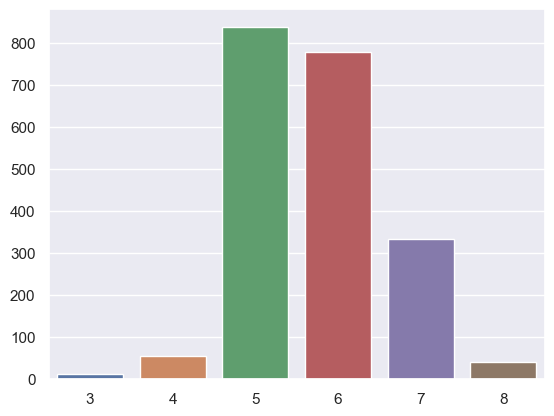

In [11]:
# barplot
sns.barplot(x=quality.value_counts().index, y=quality.value_counts().values)
plt.show()

The data is imbalanced as very few instances of class 3, 4 and 8 are present

<br>
<br>

#### fixed acidity

In [14]:
# extracting fixed acidity
fixed_acidity = train_data['fixed acidity']

In [16]:
# descriptive stats
fixed_acidity.describe()

count    2056.000000
mean        8.365175
std         1.705390
min         5.000000
25%         7.200000
50%         7.950000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

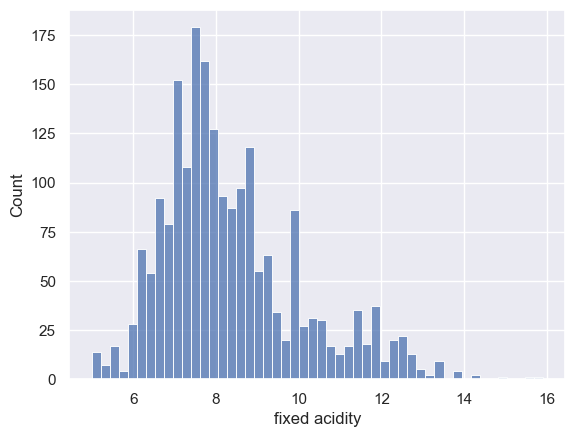

In [19]:
# histogram
sns.histplot(x=fixed_acidity, bins=50)
plt.show()

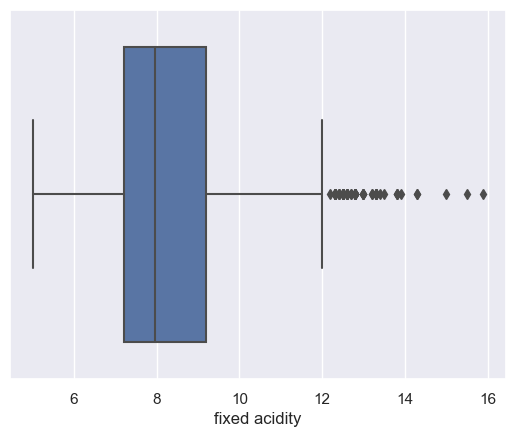

In [21]:
# boxlplot
sns.boxplot(x=fixed_acidity)
plt.show()

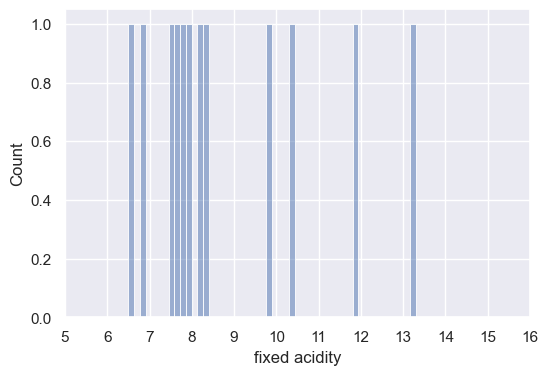

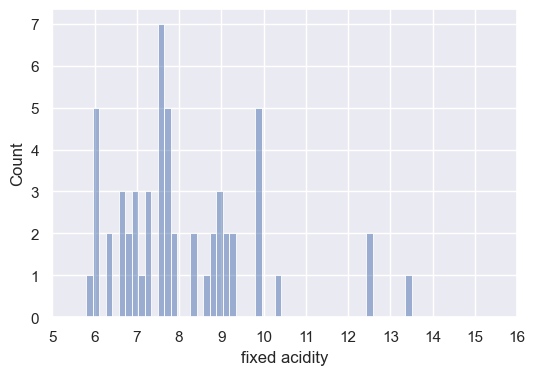

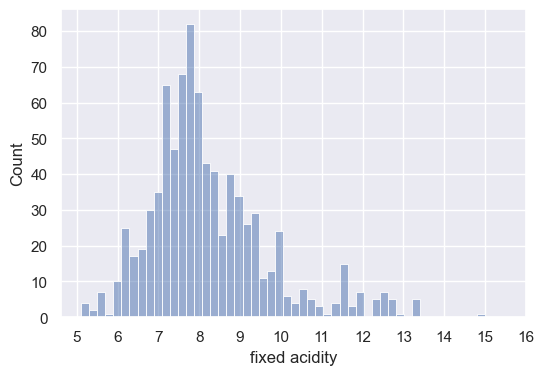

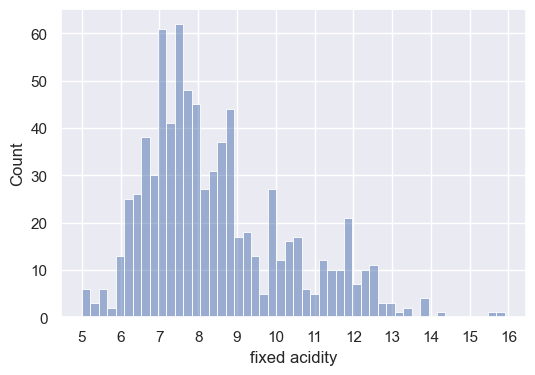

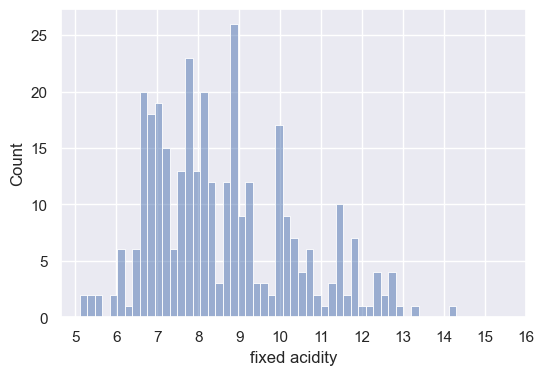

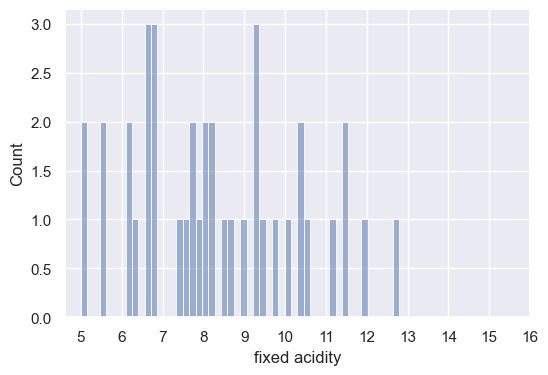

In [36]:
# histograms for individual target class
plt.figure(figsize=(6, 4))
ax = sns.histplot(x=train_data[quality == 3]['fixed acidity'], bins=50, alpha=0.5)
ax.set_xticks(range(5, 17, 1))
plt.show()

plt.figure(figsize=(6, 4))
ax = sns.histplot(x=train_data[quality == 4]['fixed acidity'], bins=50, alpha=0.5)
ax.set_xticks(range(5, 17, 1))
plt.show()

plt.figure(figsize=(6, 4))
ax = sns.histplot(x=train_data[quality == 5]['fixed acidity'], bins=50, alpha=0.5)
ax.set_xticks(range(5, 17, 1))
plt.show()

plt.figure(figsize=(6, 4))
ax = sns.histplot(x=train_data[quality == 6]['fixed acidity'], bins=50, alpha=0.5)
ax.set_xticks(range(5, 17, 1))
plt.show()

plt.figure(figsize=(6, 4))
ax = sns.histplot(x=train_data[quality == 7]['fixed acidity'], bins=50, alpha=0.5)
ax.set_xticks(range(5, 17, 1))
plt.show()

plt.figure(figsize=(6, 4))
ax = sns.histplot(x=train_data[quality == 8]['fixed acidity'], bins=50, alpha=0.5)
ax.set_xticks(range(5, 17, 1))
plt.show()

In [38]:
# linear correlation coefficient
np.corrcoef(fixed_acidity, quality)[0, 1]

0.07385176097299481

doesn't seem to have that much impact on the quality of wine

<br>
<br>

#### volatile acidity

In [39]:
# extracting volatile acidity
volatile_acidity = train_data['volatile acidity']

In [41]:
# descriptive stats
volatile_acidity.describe()

count    2056.000000
mean        0.527601
std         0.173164
min         0.180000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

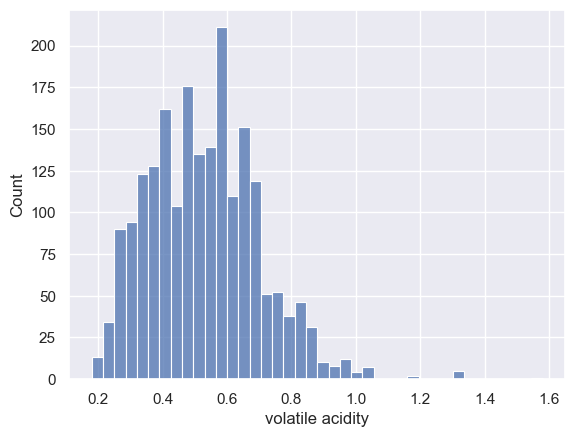

In [44]:
# histogram
sns.histplot(x=volatile_acidity, bins=40)
plt.show()

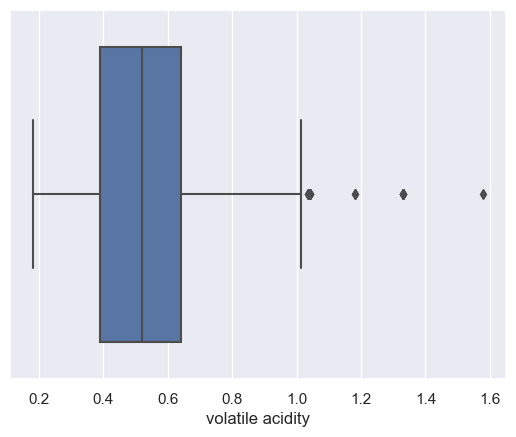

In [45]:
# boxplot
sns.boxplot(x=volatile_acidity)
plt.show()

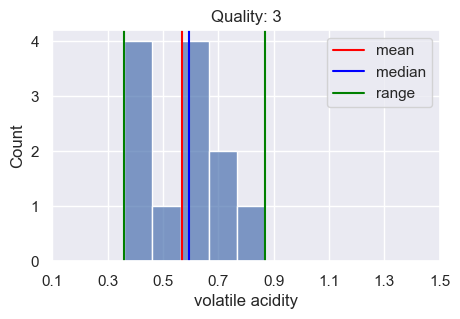

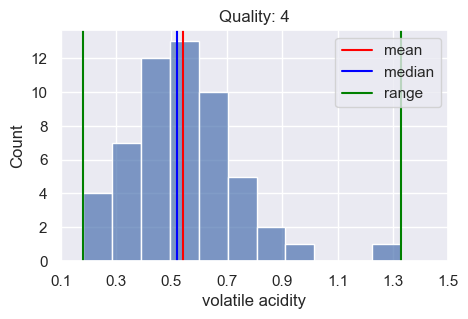

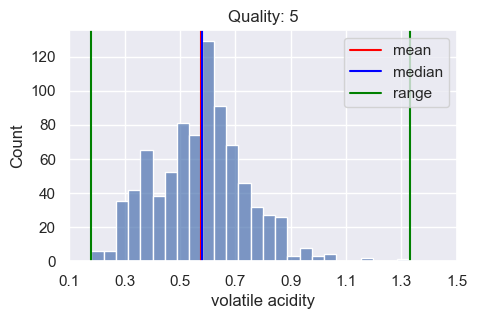

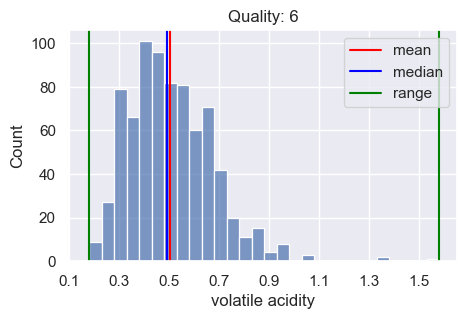

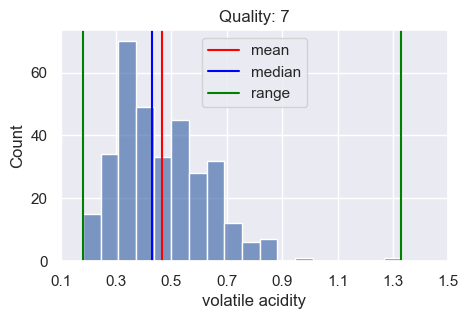

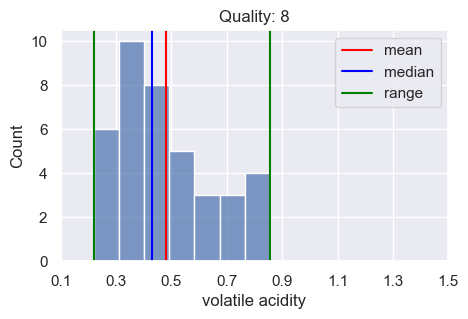

In [66]:
# histograms for individual target class
# with mean, median and range
for i in range(3, 9):

    plt.figure(figsize=(5, 3))

    x_temp = train_data[quality == i]['volatile acidity']

    ax = sns.histplot(x=x_temp, alpha=0.7)

    plt.axvline(x_temp.mean(), color='red', label='mean')
    plt.axvline(x_temp.median(), color='blue', label='median')
    plt.axvline(x_temp.min(), color='green', label='range')
    plt.axvline(x_temp.max(), color='green')

    ax.set_xticks([item / 10 for item in range(1, 16, 2)])
    plt.title(f"Quality: {i}")
    plt.legend()
    plt.show()

In [67]:
# linear correlation coefficient
np.corrcoef(volatile_acidity, quality)[0, 1]

-0.2192869377037594

As the volatile acidity increases, quality decreases

<br>
<br>

#### citric acid

In [68]:
# extracting citric acid
citric_acid = train_data['citric acid']

In [70]:
# descriptive stats
citric_acid.describe()

count    2056.000000
mean        0.265058
std         0.188267
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         0.760000
Name: citric acid, dtype: float64

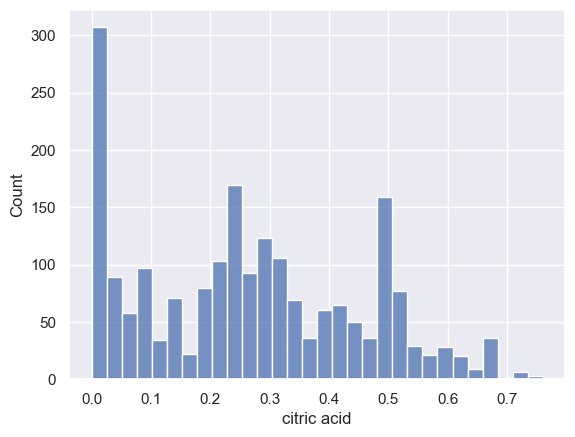

In [73]:
# histogram
sns.histplot(x=citric_acid, bins=30)
plt.show()

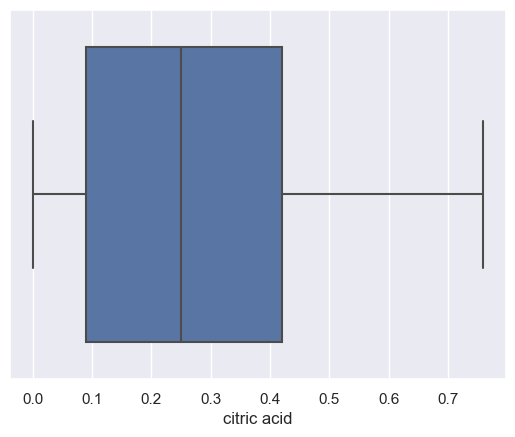

In [74]:
# boxplot
sns.boxplot(x=citric_acid)
plt.show()

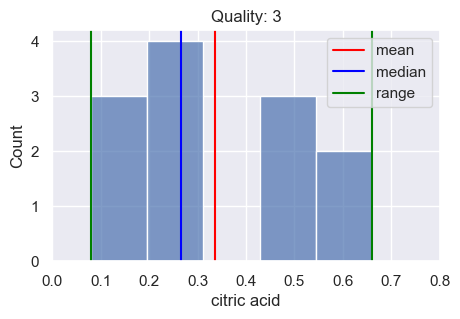

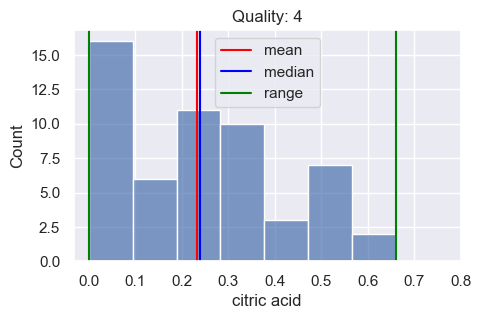

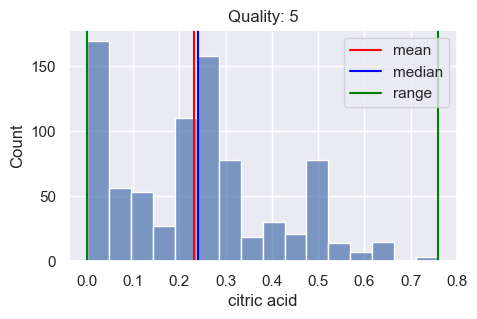

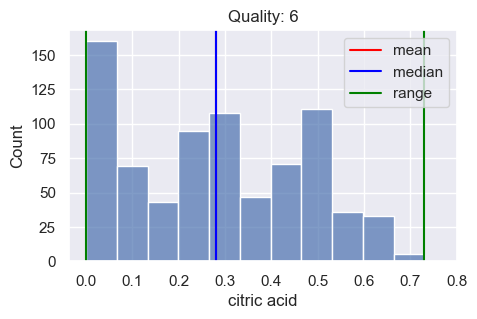

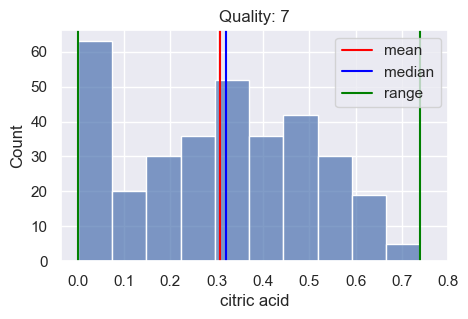

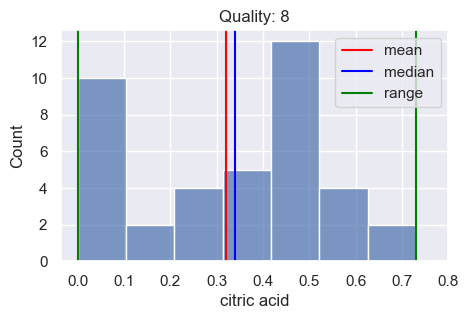

In [76]:
# histograms for individual target class
# with mean, median and range
for i in range(3, 9):

    plt.figure(figsize=(5, 3))

    x_temp = train_data[quality == i]['citric acid']

    ax = sns.histplot(x=x_temp, alpha=0.7)

    plt.axvline(x_temp.mean(), color='red', label='mean')
    plt.axvline(x_temp.median(), color='blue', label='median')
    plt.axvline(x_temp.min(), color='green', label='range')
    plt.axvline(x_temp.max(), color='green')

    ax.set_xticks([item / 10 for item in range(9)])
    plt.title(f"Quality: {i}")
    plt.legend()
    plt.show()

In [78]:
# linear correlation coefficient
np.corrcoef(citric_acid, quality)[0, 1]

0.1417973813737747

As critric acid increases, quality increases

<br>
<br>

#### residual sugar

In [83]:
# get genral data about the feature
def get_data(feature_name: str, bins: int = 30):

    print(train_data[feature_name].describe())

    sns.histplot(x=train_data[feature_name], bins=bins)
    plt.show()

    sns.boxplot(x=train_data[feature_name])
    plt.show()

In [81]:
# plot histograms for individual target class
# with mean, median and range
def quality_plots(feature_name: str, xticks: list):

    for i in range(3, 9):

        plt.figure(figsize=(5, 3))

        x_temp = train_data[quality == i][feature_name]

        ax = sns.histplot(x=x_temp, alpha=0.7)

        plt.axvline(x_temp.mean(), color='red', label='mean')
        plt.axvline(x_temp.median(), color='blue', label='median')
        plt.axvline(x_temp.min(), color='green', label='range')
        plt.axvline(x_temp.max(), color='green')

        ax.set_xticks(xticks)
        plt.title(f"Quality: {i}")
        plt.legend()
        plt.show()

count    2056.000000
mean        2.398881
std         0.858824
min         1.200000
25%         1.900000
50%         2.200000
75%         2.600000
max        14.000000
Name: residual sugar, dtype: float64


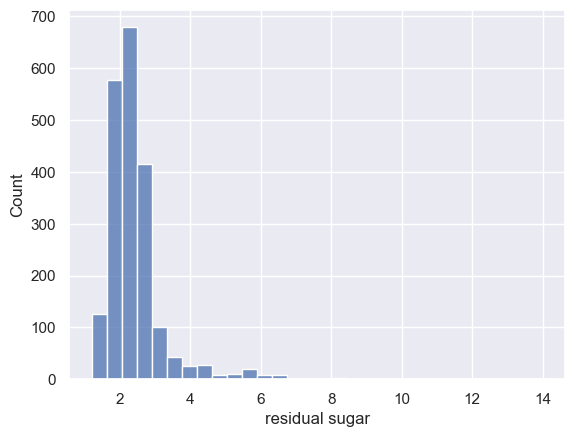

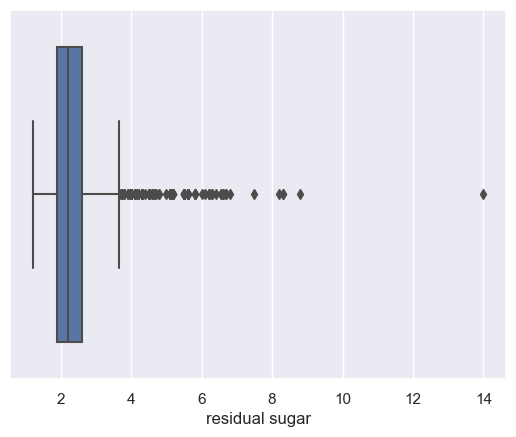

In [84]:
# residual sugar
get_data('residual sugar')

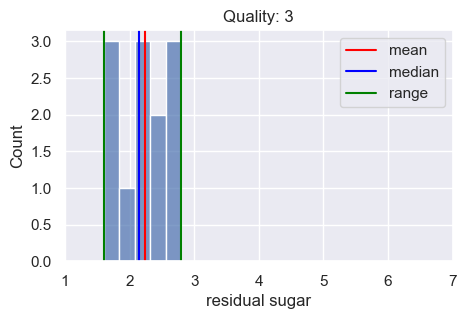

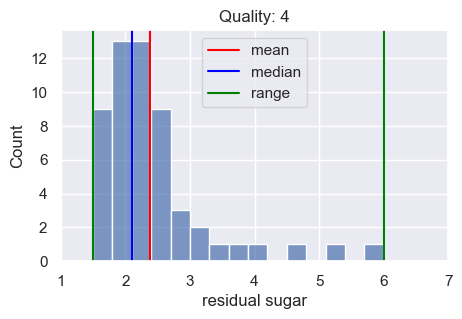

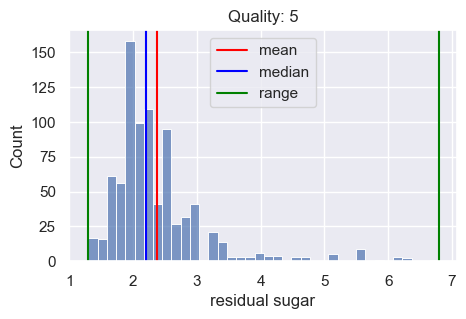

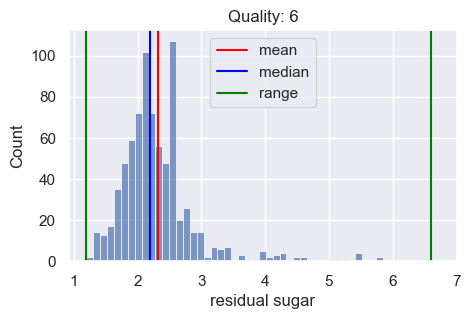

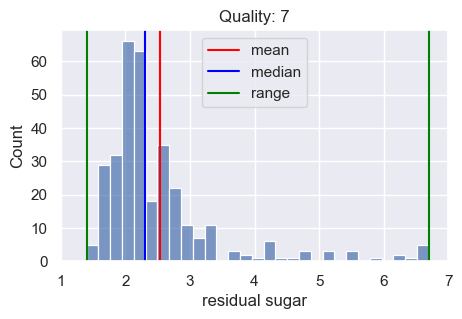

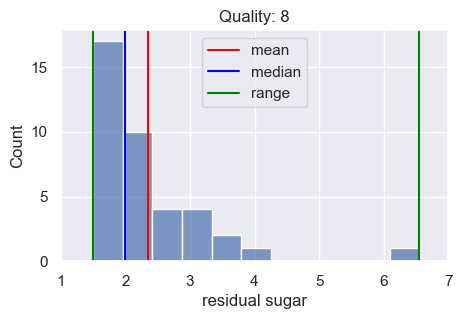

In [86]:
# histograms for individual target class
# with mean, median and range
# removing outliers
for i in range(3, 9):

    plt.figure(figsize=(5, 3))

    x_temp = train_data[(quality == i) & (train_data['residual sugar'] <= 7)]['residual sugar']

    ax = sns.histplot(x=x_temp, alpha=0.7)

    plt.axvline(x_temp.mean(), color='red', label='mean')
    plt.axvline(x_temp.median(), color='blue', label='median')
    plt.axvline(x_temp.min(), color='green', label='range')
    plt.axvline(x_temp.max(), color='green')

    ax.set_xticks(range(1, 8))
    plt.title(f"Quality: {i}")
    plt.legend()
    plt.show()

In [87]:
# linear corelation coefficient
np.corrcoef(train_data['residual sugar'], quality)[0, 1]

0.04815551155921264

<br>
<br>

#### general

In [88]:
# correlation between dataset features
corr = train_data.corr()

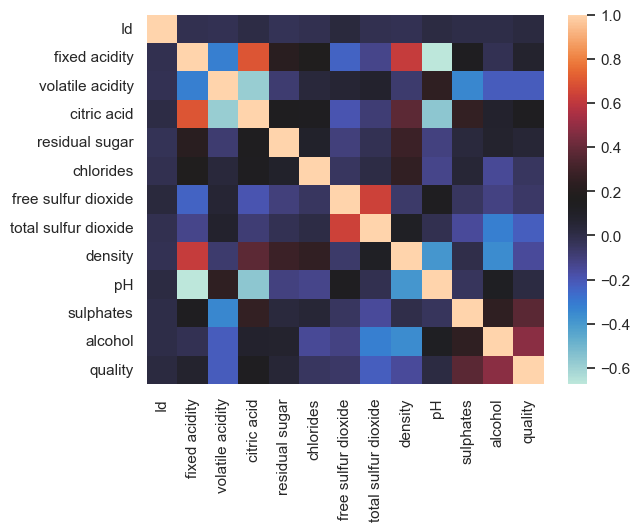

In [99]:
# plotting heatmap
sns.heatmap(corr, cmap= sns.color_palette("icefire", as_cmap=True))
plt.show()

sulphates and alcohol features tend to show high positive correlation

<br>
<br>

#### sulphates

count    2056.000000
mean        0.641308
std         0.137942
min         0.390000
25%         0.550000
50%         0.610000
75%         0.720000
max         1.950000
Name: sulphates, dtype: float64


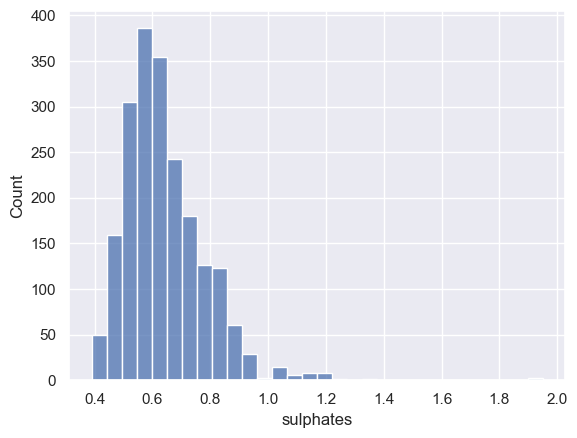

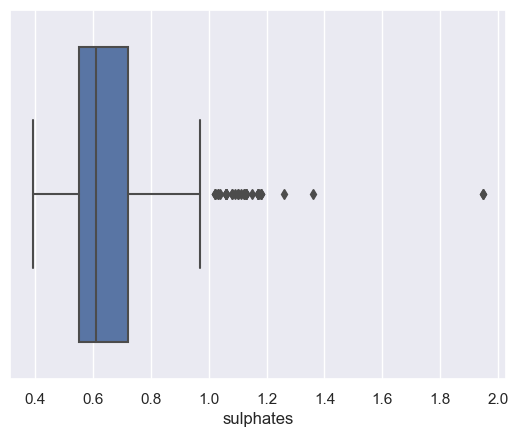

In [91]:
# sulphates feature
get_data('sulphates')

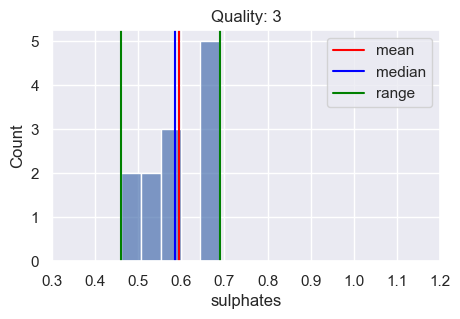

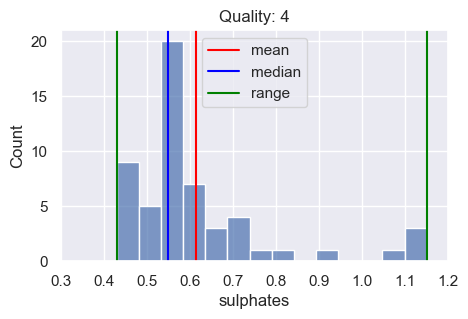

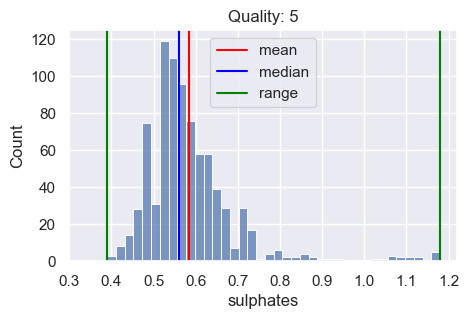

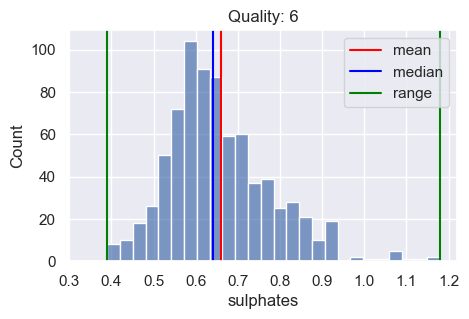

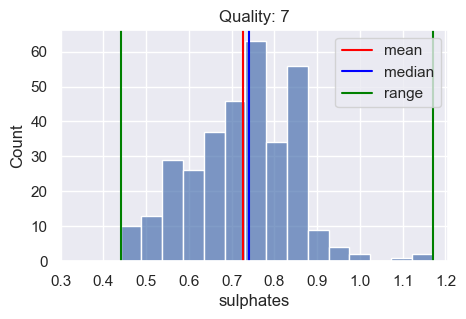

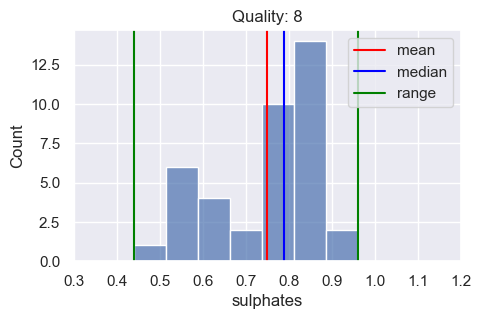

In [92]:
# histograms for individual target class
# with mean, median and range
for i in range(3, 9):

    plt.figure(figsize=(5, 3))

    x_temp = train_data[(quality == i) & (train_data['sulphates'] <= 1.2)]['sulphates']

    ax = sns.histplot(x=x_temp, alpha=0.7)

    plt.axvline(x_temp.mean(), color='red', label='mean')
    plt.axvline(x_temp.median(), color='blue', label='median')
    plt.axvline(x_temp.min(), color='green', label='range')
    plt.axvline(x_temp.max(), color='green')

    ax.set_xticks([i / 10 for i in range(3, 13)])
    plt.title(f"Quality: {i}")
    plt.legend()
    plt.show()

In [94]:
# linear correlation coefficient
np.corrcoef(train_data['sulphates'], quality)[0, 1]

0.3669385704275395

<br>
<br>

#### alcohol

count    2056.000000
mean       10.414972
std         1.028825
min         8.700000
25%         9.500000
50%        10.100000
75%        11.000000
max        14.000000
Name: alcohol, dtype: float64


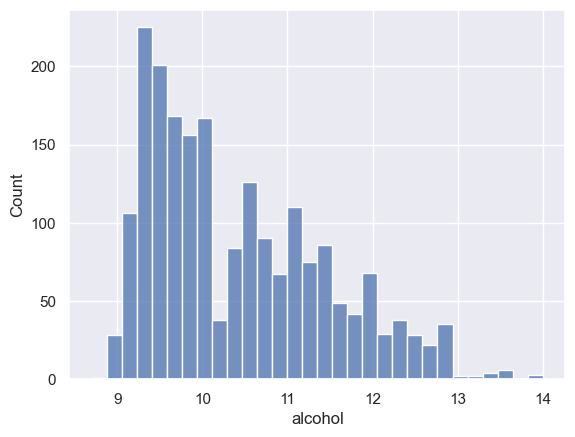

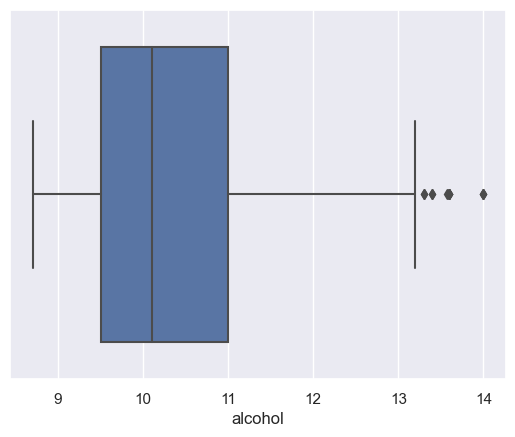

In [95]:
# alcohol feature
get_data('alcohol')

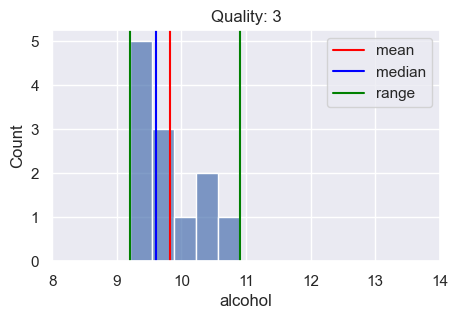

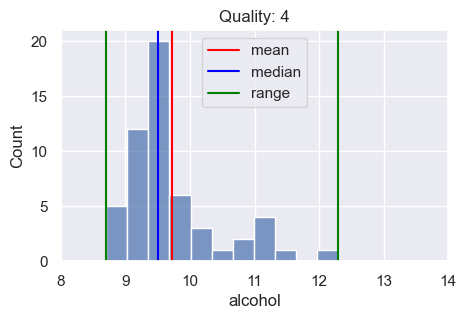

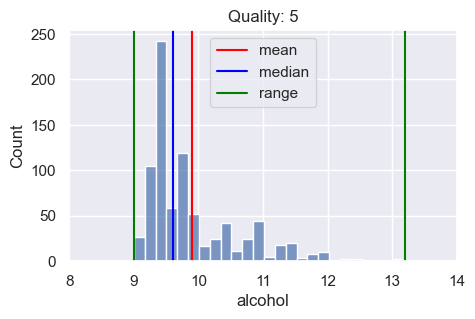

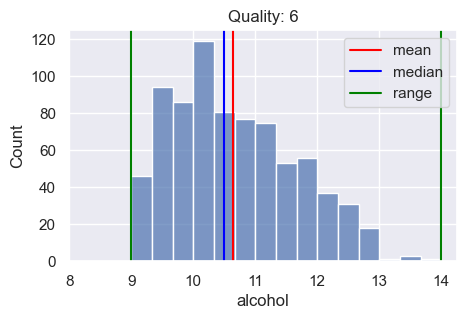

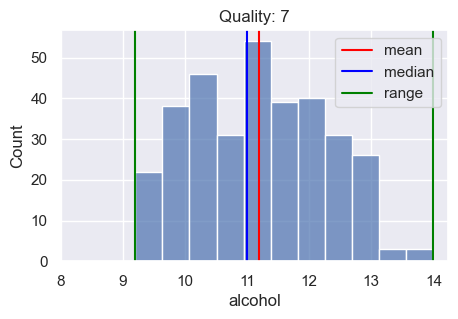

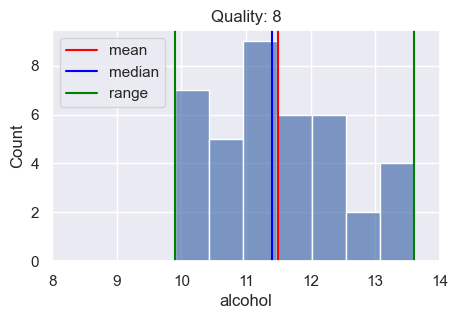

In [96]:
# target plots
quality_plots('alcohol', range(8, 15))

In [97]:
# linear correlation coefficient
np.corrcoef(train_data['alcohol'], quality)[0, 1]

0.48283277303373695